In [3]:
#Add new directory to path to import ngs and pserm
import sys
import os
path = os.getcwd()
path_with_ngs_and_pserm = os.path.dirname(path)

sys.path.append(path_with_ngs_and_pserm)

#Imports 
import tqdm
import glob
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from ngs import NGS_round_data, NGS_DMD, common_clones
from pserm import ngs_analysis, generate_clone_set
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib.colors import TwoSlopeNorm
from scipy.stats import spearmanr, pearsonr

#specify font properties for better export into adobe illustrator
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#Add myriad pro font
fpath = "/Library/Fonts/Myriad Pro Regular.ttf"
aapath = '/Library/Fonts/cour.ttf'

prop = fm.FontProperties(fname=fpath, size = 20)
tickprop = fm.FontProperties(fname = fpath, size = 16)
aaprop = fm.FontProperties(fname = aapath, size = 16)

NGS package imported


In [4]:
p1_wt = 'YRRRGAWY'

p1_muts_no_wt = {
0: ['A', 'D', 'F', 'S', 'V'],
1: ['A', 'E', 'G', 'K', 'T'],
2: ['A', 'E', 'G', 'K', 'T'],
3: ['A', 'E', 'G', 'K', 'T'],
4: ['A', 'D', 'N', 'S', 'T'],
5: ['D', 'F', 'S', 'V', 'Y'],
6: ['L', 'G', 'V', 'S', 'A'],
7: ['A', 'D', 'F', 'S', 'V']
}

p1_r1 = NGS_round_data(
    Round = 3, 
    sequence_type = 'mutations', 
    samples =[
        'Input', 'Ag1_P', 'Ag01_P', 'DA_P', 'PSR_P', 'PSR_N', 
        'Ins_P', 'Ins_N', 'Ova_P', 'Ova_N'],
    sample_of_interest = 'Input', 
    path = '../Input_Datasets/Project_1/Rep_1', 
    wild_type = p1_wt, 
    mutations_dict = p1_muts_no_wt
)

p1_r2 = NGS_round_data(
    Round = 3, 
    sequence_type = 'mutations', 
    samples =[
        'Input', 'Ag1_P', 'Ag01_P', 'DA_P', 'PSR_P', 'PSR_N', 'PSR_NB', 
        'Ins_P', 'Ins_NS', 'Ins_NB', 'Ova_P', 'Ova_N', 'Ova_NB'],
    sample_of_interest = 'Input', 
    path = '../Input_Datasets/Project_1/Rep_2', 
    wild_type = p1_wt, 
    mutations_dict = p1_muts_no_wt
)

p1_clone_set_trimmed_r1 = generate_clone_set(p1_r1, ['Input', 'Ag1_P', 'Ag01_P', 'PSR_P', 'PSR_N', 'Ova_P', 'Ova_N', 'Ins_P'])
p1_clone_set_trimmed_r2 = generate_clone_set(p1_r2, ['Input', 'Ag1_P', 'Ag01_P', 'PSR_P', 'PSR_N', 'Ova_P', 'Ova_N', 'Ins_P'])
p1_clone_set_trimmed = list(set(p1_clone_set_trimmed_r1).union(set(p1_clone_set_trimmed_r2)))

p1_data = ngs_analysis([p1_r1, p1_r2], ['Input', 'Ag1_P', 'Ag01_P', 'PSR_P', 'PSR_N', 'Ova_P', 'Ova_N'], clone_set = p1_clone_set_trimmed)

p1_data.generate_D()

for pssm in glob.glob('../Project_PSSMs/Project_1/*.xlsx'):
    p1_data.load_pssm(pssm.split('.xlsx')[0].split('/')[-1], pssm, excel_or_csv = 'excel')

for ppm in glob.glob('../Project_PPMs/Project_1/*.xlsx'):    
    p1_data.load_ppm(ppm.split('.xlsx')[0].split('/')[-1], ppm, excel_or_csv = 'excel')

for sample in p1_data.samples:
    if sample != 'Input':
        p1_data.generate_PSERM(In_sample = 'Input', Out_sample = sample)


['Mutation_139624.csv', 'Mutation_139625.csv', 'Mutation_139626.csv', 'Mutation_139627.csv', 'Mutation_139628.csv', 'Mutation_139629.csv', 'Mutation_139630.csv', 'Mutation_139631.csv', 'Mutation_139632.csv', 'Mutation_139633.csv']
['Mutation_140403.csv', 'Mutation_140404.csv', 'Mutation_140405.csv', 'Mutation_140406.csv', 'Mutation_140407.csv', 'Mutation_140408.csv', 'Mutation_140409.csv', 'Mutation_140410.csv', 'Mutation_140411.csv', 'Mutation_140412.csv', 'Mutation_140413.csv', 'Mutation_140414.csv', 'Mutation_140415.csv']


100%|██████████| 774931/774931 [00:01<00:00, 450407.41it/s]


In [3]:
for pssm in glob.glob('../Project_PSSMs/Project_1/Fixed_Residue_PSSM/*.xlsx'):
    p1_data.load_pssm(pssm.split('.xlsx')[0].split('/')[-1], pssm, excel_or_csv = 'excel')

for pos, aalist in tqdm.tqdm(p1_data.library.items()):
    for aa in aalist:
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_Ag01_P')
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_Ova_P')

100%|██████████| 8/8 [00:00<00:00, 726.88it/s]


In [4]:
p1_data.generate_multi_mut_freq_data(['Input', 'Ag01_P', 'Ova_P'], num_muts = 1)

100%|██████████| 14/14 [00:22<00:00,  1.63s/it]


In [5]:
for file in glob.glob('../Project_PSSMs/Project_1/Multi_Mutation_PPM/*.xlsx'):
    name, num_muts = file.split('/')[-1].split('.')[0][0:-2], int(file.split('/')[-1].split('.')[0][-1])
    p1_data.load_multi_mut_ppm(name, num_muts, file, excel_or_csv = 'xlsx')


In [6]:
for nm in [2, 3]:
    for s, df in p1_data.multi_muts_freq[nm].items():
        df.to_excel(f'../Project_PSSMs/Project_1/Multi_Mutation_PPM/{s}_{nm}.xlsx')

In [8]:
#ag01p_dmer_1 = np.log2(p1_data.multi_muts_freq[1]['Ag01_P'] / p1_data.multi_muts_freq[1]['Input'])
#ovap_dmer_1 = np.log2(p1_data.multi_muts_freq[1]['Ova_P'] / p1_data.multi_muts_freq[1]['Input'])

ag01p_dmer_2 = np.log2(p1_data.multi_muts_freq[2]['Ag01_P'] / p1_data.multi_muts_freq[2]['Input'])
ovap_dmer_2 = np.log2(p1_data.multi_muts_freq[2]['Ova_P'] / p1_data.multi_muts_freq[2]['Input'])

ag01p_dmer_3 = np.log2(p1_data.multi_muts_freq[3]['Ag01_P'] / p1_data.multi_muts_freq[3]['Input'])
ovap_dmer_3 = np.log2(p1_data.multi_muts_freq[3]['Ova_P'] / p1_data.multi_muts_freq[3]['Input'])

In [46]:
num_muts = 0
for m in p3.index:
    for p in p3.columns:
        try:
            if m[p.index('4')] == 'N':
                if p3.loc[m, p] != 0:
                    num_muts += 1
        except:
            pass

print(num_muts)

756


In [47]:
num_muts = 0
for m in p2.index:
    for p in p2.columns:
        try:
            if m[p.index('4')] == 'N':
                if p2.loc[m, p] != 0:
                    num_muts += 1
        except:
            pass

print(num_muts)

42


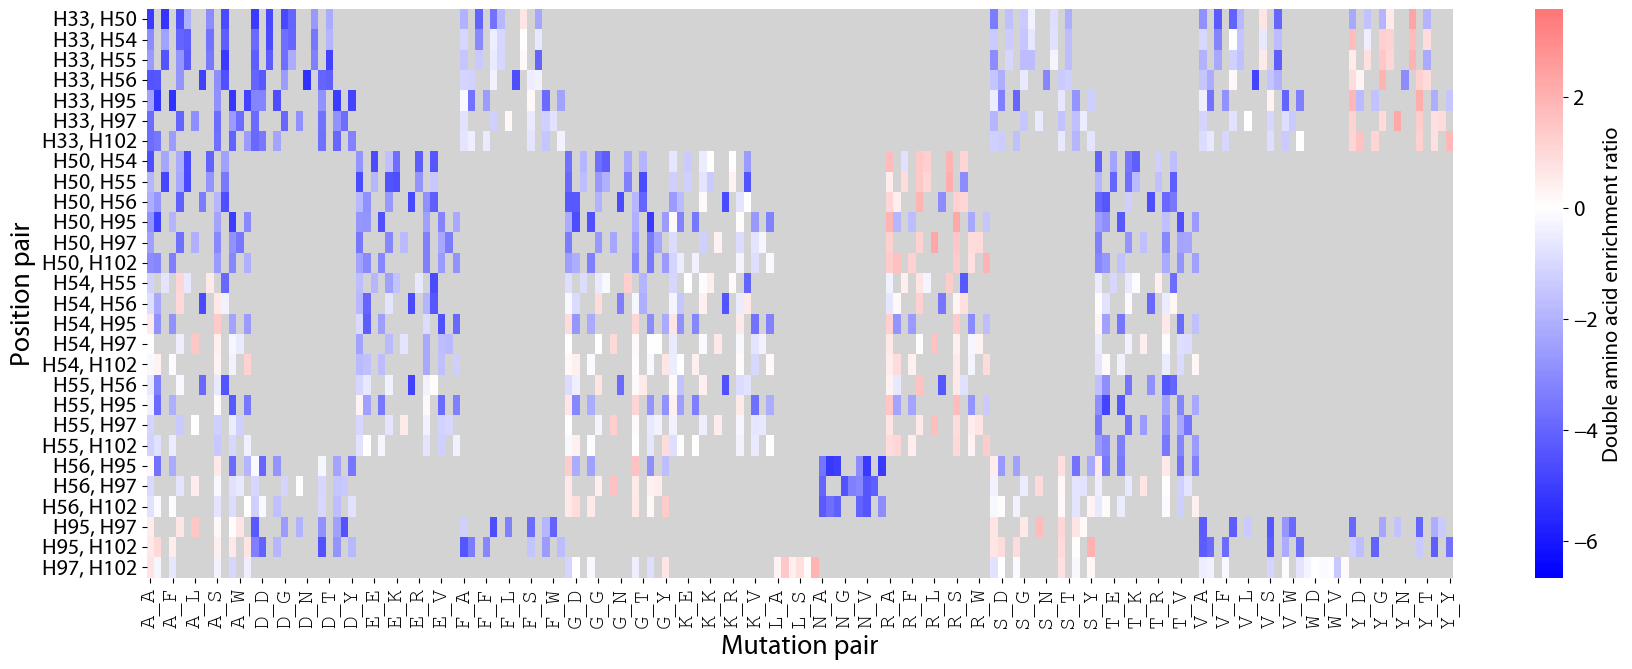

In [15]:
fig, ax = plt.subplots(figsize = (18, 6.8))

mask = np.zeros_like(ag01p_dmer_2.sort_index())
for i, dm in enumerate(ag01p_dmer_2.sort_index().index):
    for j, dp in enumerate(ag01p_dmer_2.sort_index().columns):
        check = 0
        for p, m in enumerate(dm.split('_')): 
            if m not in p1_data.library[int(dp.split('_')[p])]:
                check = 1
    
        mask[i, j] = check

sns.heatmap(ag01p_dmer_2.sort_index().T, cmap = 'bwr', ax = ax, 
            center = 0, mask = mask.T, vmin = ag01p_dmer_3.min().min(), 
            vmax = ag01p_dmer_3.max().max())
ax.set_facecolor('lightgrey')
for tick in ax.get_yticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax.get_xticklabels():
    tick.set_fontproperties(aaprop)

current_ylabels = ax.get_yticklabels()
current_yticks = ax.get_yticks()
new_yticks = [p for i, p in enumerate(current_yticks) if i % 2 == 0]

####
current_xlabels = ax.get_xticklabels()
current_xticks = ax.get_xticks()
new_xticks = [p for i, p in enumerate(current_xticks) if i % 2 == 0]
new_xticklabels = [l for i,l in enumerate(current_xlabels) if i % 2 == 0]

ylabels=['H33', 'H50', 'H54', 'H55', 'H56', 'H95', 'H97', 'H102']
ylabels_pair = []
for c in current_ylabels:
    pos = [ylabels[int(t)] for t in c.get_text().split('_')]
    ylabels_pair.append(f'{pos[0]}, {pos[1]}')
#new_xlabels_pair = [l for i, l in enumerate(xlabels_pair) if i % 2 == 0]

#ax.set_xticks(new_xticks)
ax.set_yticklabels(ylabels_pair, fontproperties = tickprop, rotation = 0)

#ax.set_yticks(new_yticks)
#ax.set_yticklabels(new_yticklabels, fontproperties = aaprop)

colorbar = ax.collections[0].colorbar
colorbar.set_label(f'Double amino acid enrichment ratio', fontproperties = tickprop)
for tick in colorbar.ax.get_yticklabels():
    tick.set_fontproperties(tickprop)

ax.set_ylabel('Position pair', fontproperties = prop)
ax.set_xlabel('Mutation pair', fontproperties = prop)
plt.tight_layout()
#plt.savefig('Fig. S3 B multi-mut PSERM.pdf')

plt.show()

bdat NOT subset; don't know how to subset; dropped
bloc NOT subset; don't know how to subset; dropped


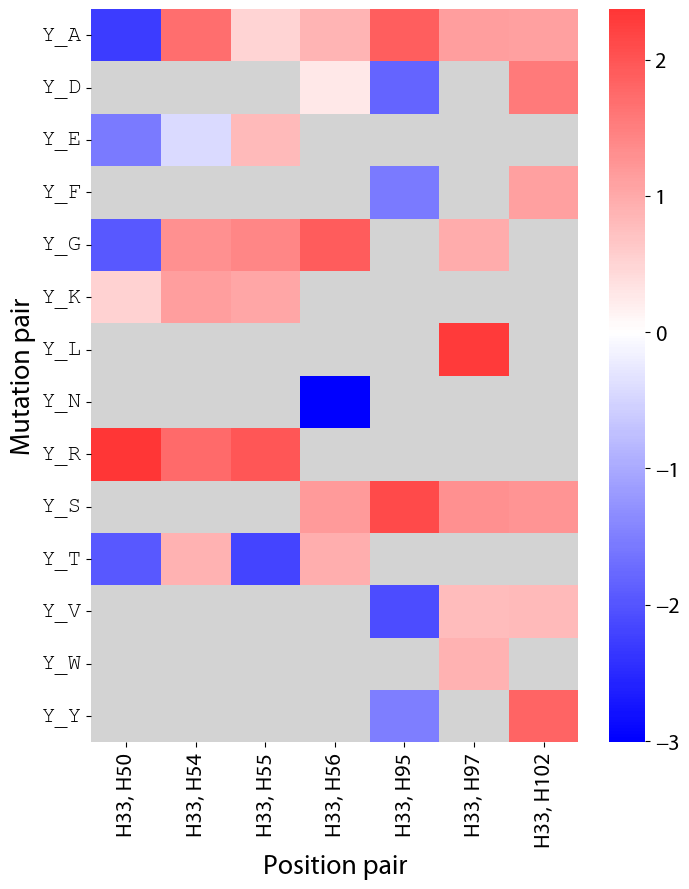

In [26]:
fig, ax = plt.subplots(figsize = (7.2, 9))

mask = np.zeros_like(ag01p_dmer_2.sort_index())
for i, dm in enumerate(ag01p_dmer_2.sort_index().index):
    for j, dp in enumerate(ag01p_dmer_2.sort_index().columns):
        check = 0
        for p, m in enumerate(dm.split('_')): 
            if m not in p1_data.library[int(dp.split('_')[p])]:
                check = 1
    
        mask[i, j] = check

rows = []
for i, mut in enumerate(ag01p_dmer_2.sort_index().iloc[:, 0:6].index):
    if mut.startswith('Y'):
        if not ag01p_dmer_2.loc[mut, ['0_1','0_2','0_3','0_4','0_5','0_6', '0_7']].isnull().all():
            rows.append(i)

dmer_sub = ag01p_dmer_2.sort_index().iloc[rows, 0:7]
sub_mask = mask[rows, 0:7]

sns.heatmap(dmer_sub, cmap = 'bwr', ax = ax, center = 0, mask = sub_mask, 
            vmin = dmer_sub.min().min(), 
            vmax = dmer_sub.max().max())

ax.set_facecolor('lightgrey')
for tick in ax.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(aaprop)
    tick.set_rotation(0)

current_xlabels = ax.get_xticklabels()
current_xticks = ax.get_xticks()

current_ylabels = ax.get_yticklabels()
current_yticks = ax.get_yticks()


xlabels=['H33', 'H50', 'H54', 'H55', 'H56', 'H95', 'H97', 'H102']
xlabels_pair = []
for c in current_xlabels:
    pos = [xlabels[int(t)] for t in c.get_text().split('_')]
    xlabels_pair.append(f'{pos[0]}, {pos[1]}')
#new_xlabels_pair = [l for i, l in enumerate(xlabels_pair) if i % 2 == 0]

#ax.set_xticks(new_xticks)
ax.set_xticklabels(xlabels_pair, fontproperties = tickprop, rotation = 90)

#ax.set_yticks(new_yticks)
#ax.set_yticklabels(new_yticklabels, fontproperties = aaprop)

colorbar = ax.collections[0].colorbar
#colorbar.set_label(f'amino acid enrichment ratio', fontproperties = tickprop)
for tick in colorbar.ax.get_yticklabels():
    tick.set_fontproperties(tickprop)

ax.set_xlabel('Position pair', fontproperties = prop)
ax.set_ylabel('Mutation pair', fontproperties = prop)
plt.tight_layout()
plt.savefig('Fig. S3 B multi-mut PSERM.pdf')

plt.show()

bdat NOT subset; don't know how to subset; dropped
bloc NOT subset; don't know how to subset; dropped


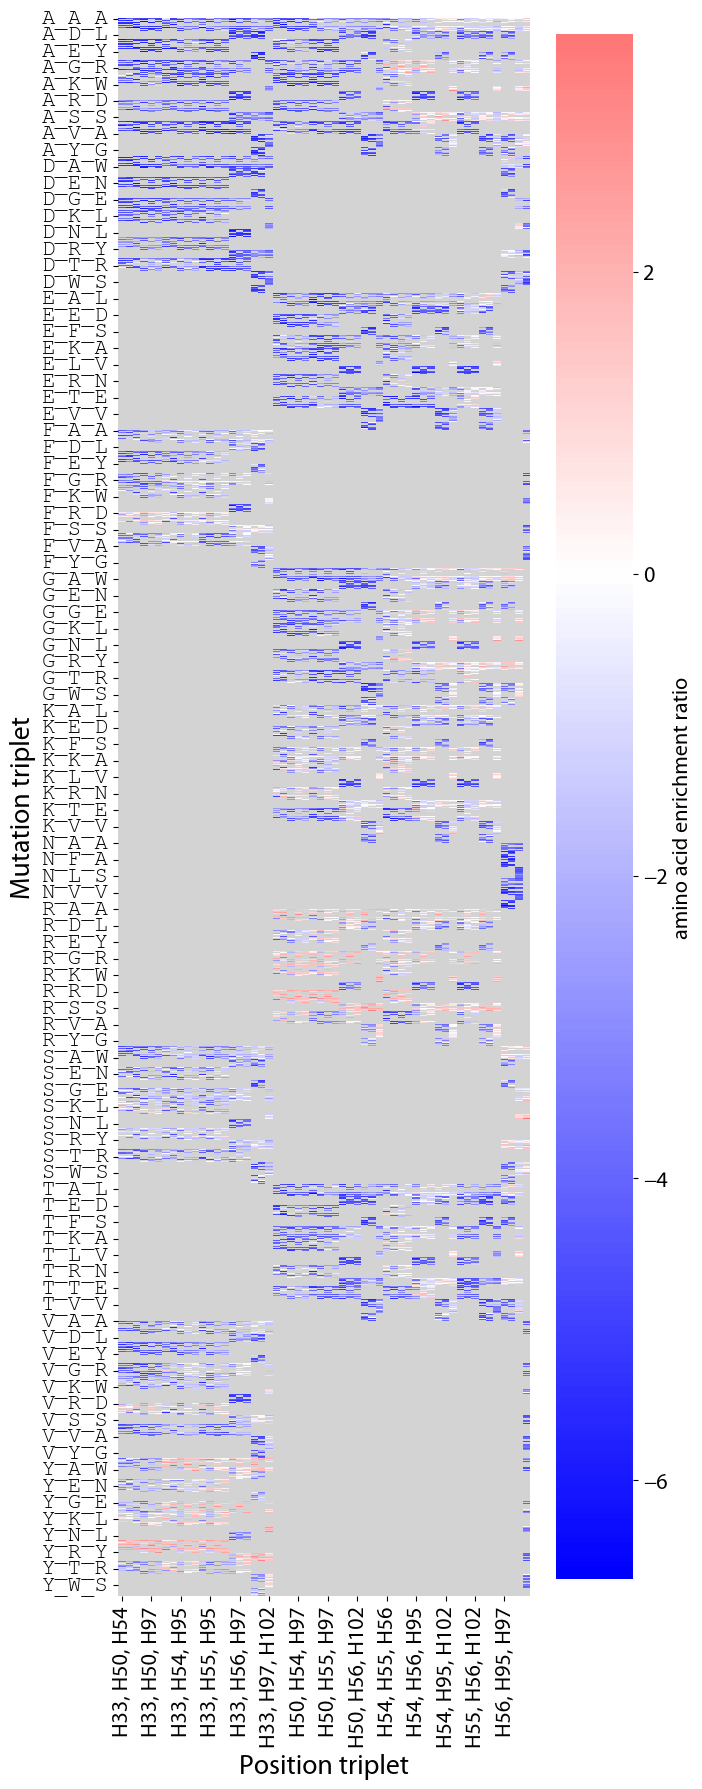

In [15]:
fig, ax = plt.subplots(figsize = (7, 18))

mask = np.zeros_like(ag01p_dmer_3.sort_index())
for i, dm in enumerate(ag01p_dmer_3.sort_index().index):
    for j, dp in enumerate(ag01p_dmer_3.sort_index().columns):
        check = 0
        for p, m in enumerate(dm.split('_')): 
            if m not in p1_data.library[int(dp.split('_')[p])]:
                check = 1
    
        mask[i, j] = check

sns.heatmap(ag01p_dmer_3.sort_index(), cmap = 'bwr', ax = ax, center = 0, mask = mask,vmin = ag01p_dmer_3.min().min(), 
            vmax = ag01p_dmer_3.max().max())
ax.set_facecolor('lightgrey')
for tick in ax.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(aaprop)

current_xticks = ax.get_xticks()
current_xlabels = ax.get_xticklabels()
new_xticks = [p for i, p in enumerate(current_xticks) if i % 2 == 0]

xlabels=['H33', 'H50', 'H54', 'H55', 'H56', 'H95', 'H97', 'H102']
xlabels_trip = []
for c in current_xlabels:
    pos = [xlabels[int(t)] for t in c.get_text().split('_')]
    xlabels_trip.append(f'{pos[0]}, {pos[1]}, {pos[2]}')
new_xlabels_trip = [l for i, l in enumerate(xlabels_trip) if i % 2 == 0]

current_ylabels = ax.get_yticklabels()
current_yticks = ax.get_yticks()
new_yticks = [p for i, p in enumerate(current_yticks) if i % 2 == 0]
new_yticklabels = [l for i,l in enumerate(current_ylabels) if i % 2 == 0]

#ax.set_yticks(new_yticks)
#ax.set_yticklabels(new_yticklabels, fontproperties = aaprop)

ax.set_xticks(new_xticks)
ax.set_xticklabels(new_xlabels_trip, fontproperties = tickprop, rotation = 90)

ax.set_xlabel('Position triplet', fontproperties = prop)
ax.set_ylabel('Mutation triplet', fontproperties = prop)

colorbar = ax.collections[0].colorbar
colorbar.set_label(f'amino acid enrichment ratio', fontproperties = tickprop)
for tick in colorbar.ax.get_yticklabels():
    tick.set_fontproperties(tickprop)

plt.tight_layout()
plt.savefig('Fig. S3 C multi-mut PSERM.pdf')
plt.show()

bdat NOT subset; don't know how to subset; dropped
bloc NOT subset; don't know how to subset; dropped


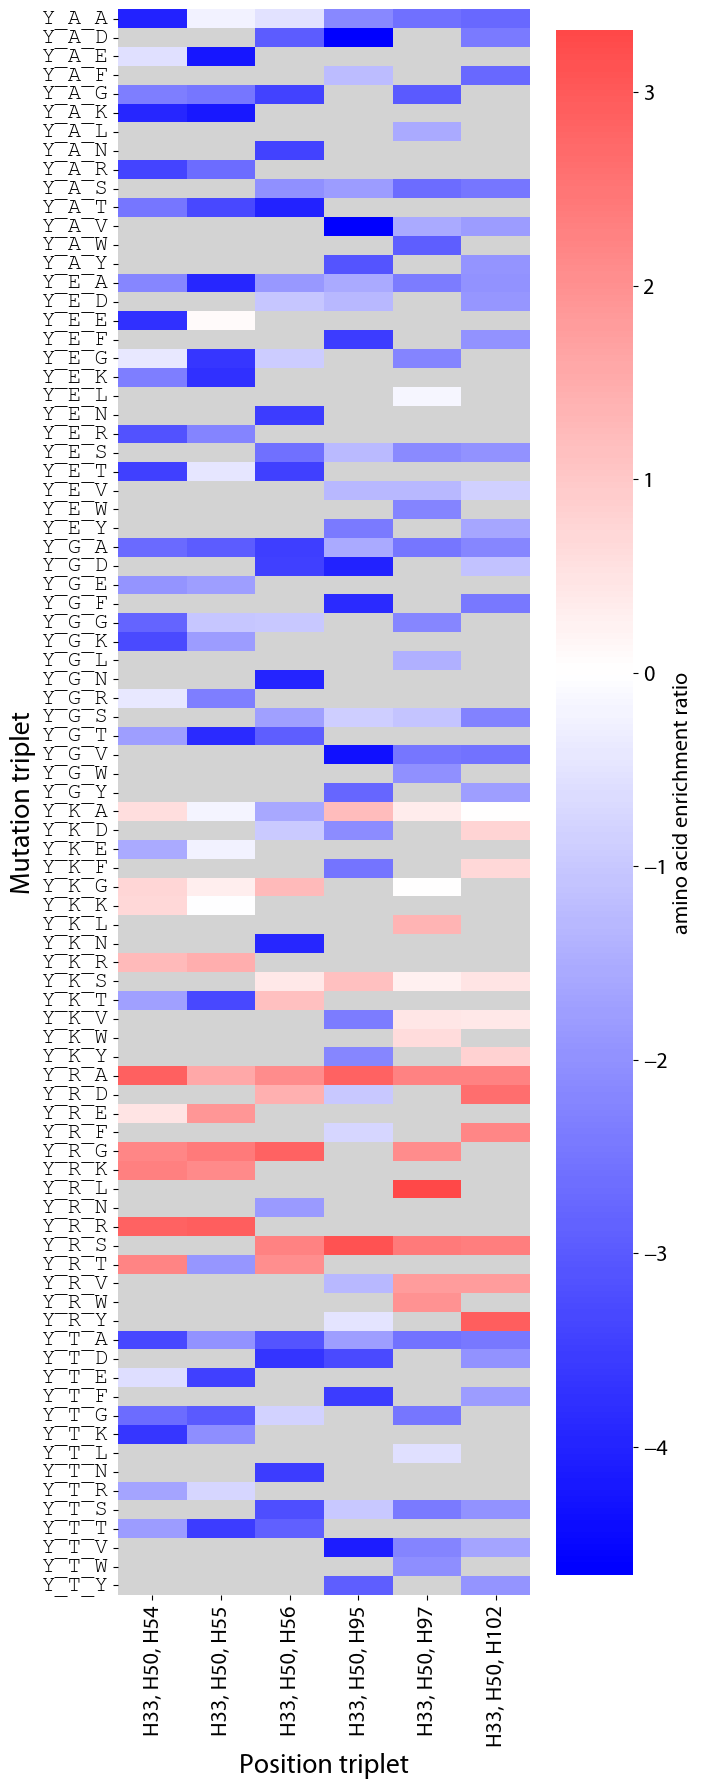

In [11]:
fig, ax = plt.subplots(figsize = (7, 18))

mask = np.zeros_like(ag01p_dmer_3.sort_index())
for i, dm in enumerate(ag01p_dmer_3.sort_index().index):
    for j, dp in enumerate(ag01p_dmer_3.sort_index().columns):
        check = 0
        for p, m in enumerate(dm.split('_')): 
            if m not in p1_data.library[int(dp.split('_')[p])]:
                check = 1
    
        mask[i, j] = check

rows = []
for i, mut in enumerate(ag01p_dmer_3.sort_index().iloc[:, 0:6].index):
    if mut.startswith('Y'):
        if not ag01p_dmer_3.loc[mut, ['0_1_2','0_1_3','0_1_4','0_1_5','0_1_6','0_1_7']].isnull().all():
            rows.append(i)
dmer_sub = ag01p_dmer_3.sort_index().iloc[rows, 0:6]
sub_mask = mask[rows, 0:6]
sns.heatmap(dmer_sub, cmap = 'bwr', ax = ax, center = 0, mask = sub_mask, 
            vmin = dmer_sub.min().min(), 
            vmax = dmer_sub.max().max())

current_xticks = ax.get_xticks()
current_xlabels = ax.get_xticklabels()
xlabels=['H33', 'H50', 'H54', 'H55', 'H56', 'H95', 'H97', 'H102']
xlabels_trip = []
for c in current_xlabels:
    pos = [xlabels[int(t)] for t in c.get_text().split('_')]
    xlabels_trip.append(f'{pos[0]}, {pos[1]}, {pos[2]}')

ax.set_xticklabels(xlabels_trip, fontproperties = tickprop, rotation = 90)

ax.set_facecolor('lightgrey')
for tick in ax.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(aaprop)

ax.set_xlabel('Position triplet', fontproperties = prop)
ax.set_ylabel('Mutation triplet', fontproperties = prop)

colorbar = ax.collections[0].colorbar
colorbar.set_label(f'amino acid enrichment ratio', fontproperties = tickprop)
for tick in colorbar.ax.get_yticklabels():
    tick.set_fontproperties(tickprop)

plt.tight_layout()
plt.savefig('Fig. S3 D multi-mut PSERM.pdf')
plt.show()

# Figure 7

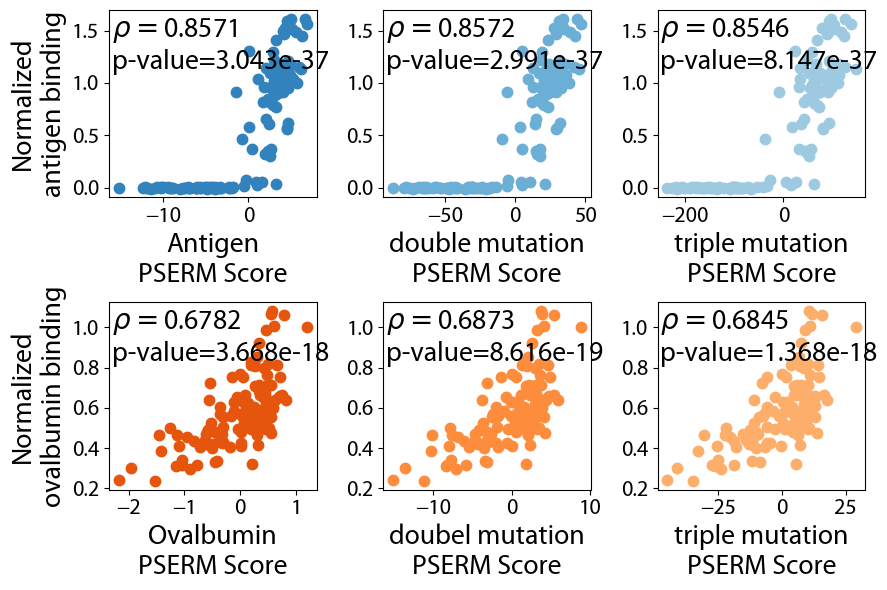

In [52]:
p1_binding = pd.read_excel('../3_Binding_Correlations_Figure/p1_binding_with_ngs_scores.xlsx', index_col=0)
p1_binding.drop('YRTREAGD', inplace = True)

ag_1_context_score = []
ag_2_context_score = []
ag_3_context_score = []
for c in p1_binding.index:
    s = 0
    n = 0
    t = 0
    for i, aa in enumerate(c):
        n += ag01p_dmer_1.loc[f'{c[i]}', f'{i}']# / len(p1_data.wt)
        #s += ag01p_dmer_1.loc[f'{c[i]}', f'{i}']# / len(p1_data.wt)
        #t += ag01p_dmer_1.loc[f'{c[i]}', f'{i}']# / len(p1_data.wt)
        if i < len(p1_data.wt) - 1:
            for j in range(i + 1, len(p1_data.wt)):
                #s += ag01p_dmer_2.loc[f'{c[i]}_{c[j]}', f'{i}_{j}']# / 28
                t += ag01p_dmer_2.loc[f'{c[i]}_{c[j]}', f'{i}_{j}']# / 28
                if j < len(p1_data.wt):
                    for k in range(j + 1, len(p1_data.wt)):
                        s += ag01p_dmer_3.loc[f'{c[i]}_{c[j]}_{c[k]}', f'{i}_{j}_{k}']# / 56
                       
    ag_1_context_score.append(n)
    ag_2_context_score.append(t)
    ag_3_context_score.append(s)

r1, p1 = spearmanr(p1_binding['ANT Binding'], ag_1_context_score, nan_policy='omit')
r2, p2 = spearmanr(p1_binding['ANT Binding'], ag_2_context_score, nan_policy='omit')
r3, p3 = spearmanr(p1_binding['ANT Binding'], ag_3_context_score, nan_policy='omit')

ova_1_context_score = []
ova_2_context_score = []
ova_3_context_score = []
for c in p1_binding.index:
    s = 0
    n = 0
    t = 0
    for i, aa in enumerate(c):
        n += ovap_dmer_1.loc[f'{c[i]}', f'{i}']# / len(p1_data.wt)
        #s += ovap_dmer_1.loc[f'{c[i]}', f'{i}']# / len(p1_data.wt)
        #t += ovap_dmer_1.loc[f'{c[i]}', f'{i}']# / len(p1_data.wt)
        if i < len(p1_data.wt) - 1:
            for j in range(i + 1, len(p1_data.wt)):
                #s += ovap_dmer_2.loc[f'{c[i]}_{c[j]}', f'{i}_{j}']# / 28
                t += ovap_dmer_2.loc[f'{c[i]}_{c[j]}', f'{i}_{j}']# / 28
                if j < len(p1_data.wt):
                    for k in range(j + 1, len(p1_data.wt)):
                        s += ovap_dmer_3.loc[f'{c[i]}_{c[j]}_{c[k]}', f'{i}_{j}_{k}']# / 56
                    
    ova_1_context_score.append(n)
    ova_2_context_score.append(t)
    ova_3_context_score.append(s)

r4, p4 = spearmanr(p1_binding['OVA Binding'], ova_1_context_score, nan_policy='omit')
r5, p5 = spearmanr(p1_binding['OVA Binding'], ova_2_context_score, nan_policy='omit')
r6, p6 = spearmanr(p1_binding['OVA Binding'], ova_3_context_score, nan_policy='omit')

fig, axs = plt.subplots(2, 3, figsize = (9, 3 * 2))

axs[0, 0].plot(
    ag_1_context_score, p1_binding['ANT Binding'], '.', markersize = 15, color = plt.get_cmap('tab20c')(0),
    label = r'$\rho =$' + f'{r1:.4}\np-value={p1:.4}')
axs[0, 0].set_xlabel('Antigen\nPSERM Score', fontproperties = prop)
axs[0, 0].set_ylabel('Normalized\nantigen binding', fontproperties = prop)

axs[0, 1].plot(
    ag_2_context_score, p1_binding['ANT Binding'], '.', markersize = 15, color = plt.get_cmap('tab20c')(1),
    label = r'$\rho =$' + f'{r2:.4}\np-value={p2:.4}')
axs[0, 1].set_xlabel('double mutation\nPSERM Score', fontproperties = prop)

axs[0, 2].plot(
    ag_3_context_score, p1_binding['ANT Binding'], '.', markersize = 15, color = plt.get_cmap('tab20c')(2),
    label = r'$\rho =$' + f'{r3:.4}\np-value={p3:.4}')
axs[0, 2].set_xlabel('triple mutation\nPSERM Score', fontproperties = prop)

# OVA #
axs[1, 0].plot(
    ova_1_context_score, p1_binding['OVA Binding'], '.', markersize = 15, color = plt.get_cmap('tab20c')(4),
    label = r'$\rho =$' + f'{r4:.4}\np-value={p4:.4}')
axs[1, 0].set_xlabel('Ovalbumin\nPSERM Score', fontproperties = prop)
axs[1, 0].set_ylabel('Normalized\novalbumin binding', fontproperties = prop)

axs[1, 1].plot(
    ova_2_context_score, p1_binding['OVA Binding'], '.', markersize = 15, color = plt.get_cmap('tab20c')(5),
    label = r'$\rho =$' + f'{r5:.4}\np-value={p5:.4}')
axs[1, 1].set_xlabel('doubel mutation\nPSERM Score', fontproperties = prop)

axs[1, 2].plot(
    ova_3_context_score, p1_binding['OVA Binding'], '.', markersize = 15, color = plt.get_cmap('tab20c')(6),
    label = r'$\rho =$' + f'{r6:.4}\np-value={p6:.4}')
axs[1, 2].set_xlabel('triple mutation\nPSERM Score', fontproperties = prop)

#title1 = 'score' + r'$(s) = \sum_p \varepsilon_{p, AA}$'
#title2 = 'score' + r'$(s) = \sum_p \left ( \sum_{p_2 \neq p} \varepsilon_{(p,AA), (p_2,AA_2)} \right )$'
#title3 = 'score' + r'$(s) = \sum_p \left ( \sum_{p_2 \neq p} \left ( \sum_{p_3 \neq p_2, p} \varepsilon_{(p,AA), (p_2,AA_2), (p_3,AA_3)} \right ) \right )$'
#axs[0, 0].set_title(title1, fontproperties = tickprop)
#axs[0, 1].set_title(title2, fontproperties = tickprop)
#axs[0, 2].set_title(title3, fontproperties = tickprop)

#Format
for ax in axs.ravel():
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(tickprop)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(tickprop)

    legend = ax.legend(handlelength = 0, handletextpad = -0.1, borderaxespad = 0.2, borderpad = 0, loc = 2, prop = prop, frameon = False)
    for marker in legend.legendHandles:
        marker.set_visible(False)

plt.tight_layout()

plt.savefig('Fig. 7 Correlations for multi-residue scoring.pdf', transparent = True)

plt.show()

In [36]:
df = pd.DataFrame.from_dict(
    {'Ag Single': r1,
     'Ag Double': r2,
     'Ag Triple': r3,
     'Ova Single': r4,
     'Ova Double': r5,
     'Ova Triple': r6,
     }, orient = 'index', columns = ['rho']
)

df.to_excel('Final single double triple correlations.xlsx')

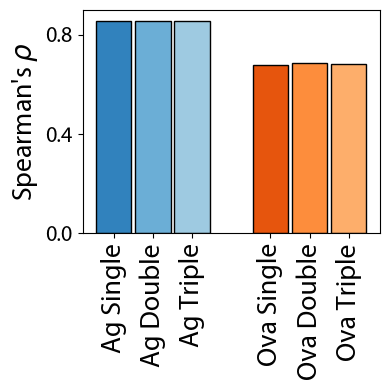

In [5]:
df = pd.read_excel('Final single double triple correlations.xlsx', index_col = 0)
fig, ax = plt.subplots(figsize = (4, 4))

x = [1,2,3, 5,6,7]

ax.bar(
    x = x, height = df['rho'],
    color = [plt.get_cmap('tab20c')(0), plt.get_cmap('tab20c')(1),
            plt.get_cmap('tab20c')(2), plt.get_cmap('tab20c')(4), 
            plt.get_cmap('tab20c')(5), plt.get_cmap('tab20c')(6)],
            width = 0.9, edgecolor = 'k'
)

ax.set_xticks([1,2,3, 5,6,7])
ax.set_xticklabels(df.index, rotation = 90, fontproperties = prop)

ax.set_yticks([0, 0.4, 0.8])
for tick in ax.get_yticklabels():
    tick.set_fontproperties(tickprop)

ax.set_ylabel(r"Spearman's $\rho$", fontproperties = prop)

plt.tight_layout()
plt.savefig('Fig. 5 Correlations for Multiple Mutation Scoring.pdf')
plt.show()

In [16]:
import scipy
def compare_corr(r1, n1, r2, n2):
    zr1 = np.log((1 + r1)/(1-r1))
    zr2 = np.log((1 + r2)/(1-r2))

    s = np.sqrt(1/(n1 - 3) + 1/(n2 - 3))

    z = (zr1 - zr2) / s
    return scipy.stats.norm.sf(abs(z)) * 2

print(compare_corr(r1, 125, r2, 125))
print(compare_corr(r1, 125, r3, 125))
print(compare_corr(r2, 125, r3, 125))

print(compare_corr(r4, 125, r5, 125))
print(compare_corr(r4, 125, r6, 125))
print(compare_corr(r5, 125, r6, 125))


0.9979792741712821
0.8841575721900665
0.8821585504967899
0.7894596376291955
0.8554352516566149
0.9324009572163156


In [25]:
print(compare_corr(0.857, 125, 0.425, 72))

print(compare_corr(0.601, 104, 0.301, 104))

3.998858619603925e-28
4.788858414073475e-08
